# Update figure only
Plot figure based on data downloaded from internet.  
Same as the data_crawler_au figures but not to download data.

In [1]:
import pandas as pd
import os
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

raw_dir = '../Raw_Data/'
in_dir = '../In_Data/'
out_dir = '../Out_Data/'

if not os.path.exists(out_dir):
    os.mkdir(out_dir)

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
dpi = 300

In [18]:
datestart = dt.date(2020, 3, 8)
datetoday = dt.date.today() - dt.timedelta(days=0)
datemodel = dt.date(2020, 3, 16)

dateend = dt.date(2020, 3, 31)
daystart = (datestart-dt.date(2020, 2, 29)).days
daymodel = (datemodel-dt.date(2020, 2, 29)).days
daytoday = (datetoday-dt.date(2020, 2, 29)).days
dayend = (dateend-dt.date(2020, 2, 29)).days

datetodaystr = datetoday.strftime('%Y_%m_%d')
datemodelstr = datemodel.strftime('%Y_%m_%d')

## Read raw data

In [19]:
df = pd.read_csv(raw_dir + 'data_au_' + datetodaystr + '.csv', index_col=[0], parse_dates=[0])

## Data analysis and figures.

In [20]:
df_log = df.copy()

df_log[df_log<=0] = np.nan
df_log = df_log.apply(lambda x: np.log(x))
df_log['day'] = (df_log.index-dt.datetime(2020,2,29)).days

In [21]:
data_x = df_log.day
data_y = df_log.Total
xmin = df_log.day[0]

def calc_rmse(est, obs):
    # make sure NaN is dropped.
    diff_2 = np.power(est-obs, 2)
    mse = np.sum(diff_2)/len(diff_2)
    return np.sqrt(mse)

def quick_polyfit(data_x, data_y):
    fit_full = np.polyfit(data_x, data_y, 1, full=True)
    a, b = fit_full[0]
    residuals = fit_full[1][0]
    r2 = 1 - residuals /data_y.var()/len(data_y)
    xfit = np.arange(daystart, dayend)
    yfit = a* xfit + b
    yfitlog = np.exp(a* xfit + b)
    rmse = calc_rmse(data_y.values, yfit[0:len(data_y)])
    return xfit, yfitlog, [a, b, r2, rmse]

In [22]:
# Test.
fit_x, fit_y, fit_stat = quick_polyfit(df_log.day, df_log.Total)

### Data in logarithmic scale. Linear fit.

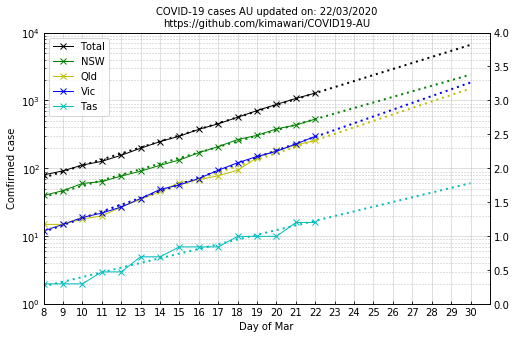

In [23]:
# Data in logarithmic scale. Linear fit.
fig = plt.figure(figsize=(8, 5))
ax = plt.gca()

states = ['Total',  'NSW', 'Qld', 'Vic', 'Tas']
color = {'Total': 'k', 'Vic': 'b',  'NSW': 'g',  'Qld': 'y', 'Tas': 'c'}
fit_stats = []

for state in states:
    ax.plot(df.day, df[state], 'x-', lw=1, c=color[state])
    fit_x, fit_y, fit_stat = quick_polyfit(df_log.day, df_log[state])
    ax.errorbar(fit_x, fit_y, dashes=(1,2), lw=2, c=color[state])
    fit_stat.append(state)
    fit_stats.append(fit_stat)

ax.set_title('COVID-19 cases AU updated on: ' + datetoday.strftime('%d/%m/%Y')
             + '\nhttps://github.com/kimawari/COVID19-AU', fontsize=10)
ax.set_xlabel('Day of Mar')
ax.set_ylabel('Comfirmed case')
ax.legend(loc='upper left')
ax.set_yscale('log')
ax.set_yticks([1, 10, 100, 1000, 10000])
ax.set_ylim(1, np.power(10, 4))
ax.set_xticks(np.arange(daystart, dayend))
ax.set_xlim(daystart, dayend)

ax2 = ax.twinx()
ax2.set_ylim(0, 4)
ax.grid(which='major', axis='both', dashes=(0.5,0.5))
ax.grid(which='minor', axis='both', dashes=(0.5,1))
ax.tick_params(which='both', direction='in')
ax2.tick_params(which='both', direction='in')

plt.savefig(out_dir + 'log_au_' + datetodaystr + '.png', dpi=dpi)

### Data in normal scale.

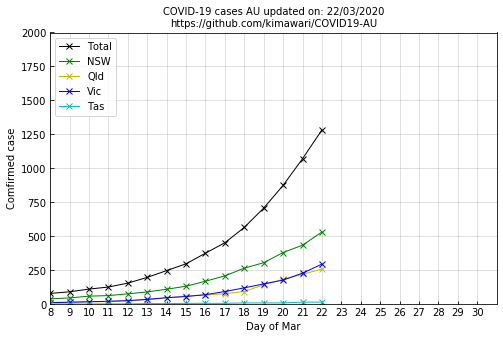

In [24]:
# Data in normal scale.
fig = plt.figure(figsize=(8, 5))
ax = plt.gca()

states = ['Total',  'NSW', 'Qld', 'Vic', 'Tas']
color = {'Total': 'k', 'Vic': 'b',  'NSW': 'g',  'Qld': 'y', 'Tas': 'c'}
fit_stats = []

for state in states:
    ax.plot(df.day, df[state], 'x-', lw=1, c=color[state])
    fit_x, fit_y, fit_stat = quick_polyfit(df_log.day, df_log[state])
    #ax.errorbar(fit_x[0:14], fit_y[0:14], dashes=(1,2), lw=2, c=color[state])
    fit_stat.append(state)
    fit_stats.append(fit_stat)

ax.set_title('COVID-19 cases AU updated on: ' + datetoday.strftime('%d/%m/%Y')
             + '\nhttps://github.com/kimawari/COVID19-AU', fontsize=10)
ax.set_xlabel('Day of Mar')
ax.set_ylabel('Comfirmed case')
ax.legend(loc='upper left')
#ax.set_yscale('log')
#ax.set_yticks([1, 10, 100, 1000, 10000])
ax.set_ylim(0, 2000)
ax.set_xticks(np.arange(daystart, dayend))
ax.set_xlim(daystart, dayend)

ax.grid(which='major', axis='both', dashes=(0.5,0.5))
ax.grid(which='minor', axis='both', dashes=(0.5,1))
ax.tick_params(which='both', direction='in')

plt.savefig(out_dir + 'linear_au_' + datetodaystr + '.png', dpi=dpi)

## Export parameters.

In [25]:
df_para = pd.DataFrame(fit_stats, columns=['a', 'b', 'r2', 'rmse', 'state'])
df_para.set_index('state', inplace=True)
df_para.to_csv(in_dir + 'para_au_' + datetodaystr + '.csv')

In [26]:
df_para

,a,b,r2,rmse
state,,,,
Total,0.204433,2.658123,0.998407,0.036526
NSW,0.188482,2.127893,0.996956,0.046579
Qld,0.219062,0.738638,0.990560,0.095667
Vic,0.230170,0.611514,0.998694,0.037227
Tas,0.158990,-0.665767,0.965778,0.134013
